# K-means clustering on Income and iris dataset

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Example 1 (age v/s income dataset)

#### GETTING THE DATASET

In [3]:
data = pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


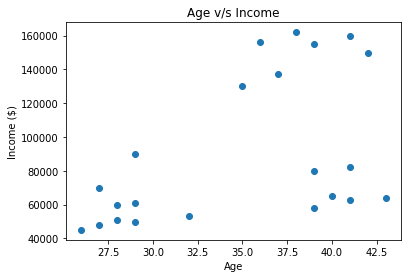

In [4]:
plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age v/s Income');

### K-MEANS CLUSTERING

In [5]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(data[['Age', 'Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
kmeans.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

PLOTTING THE CLUSTERS

Text(0, 0.5, 'Income')

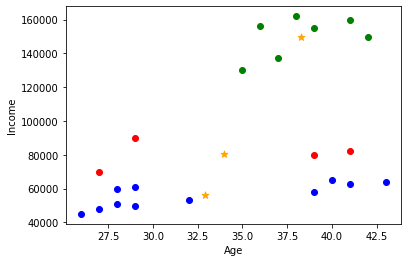

In [8]:
data1 = data[data['cluster'] == 0]
data2 = data[data['cluster'] == 1]
data3 = data[data['cluster'] == 2]

plt.scatter(data1.Age, data1['Income($)'], color='green')
plt.scatter(data2.Age, data2['Income($)'], color='blue')
plt.scatter(data3.Age, data3['Income($)'], color='red')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='orange', marker='*', s=50)

plt.xlabel('Age')
plt.ylabel('Income')

### PREPROCESSING USING MINMAXSCALER

In [9]:
scaler = MinMaxScaler()

In [10]:
data[['Age', 'Income($)']] = scaler.fit_transform(data[['Age', 'Income($)']])

In [11]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


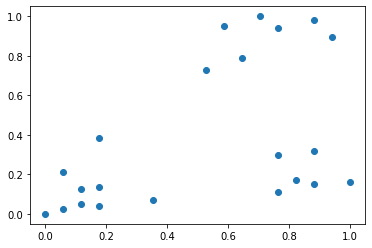

In [12]:
plt.scatter(data.Age, data['Income($)'])

In [13]:
km = KMeans(n_clusters=3)

In [14]:
pred = km.fit_predict(data[['Age', 'Income($)']])
pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
data['cluster'] = pred
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [16]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

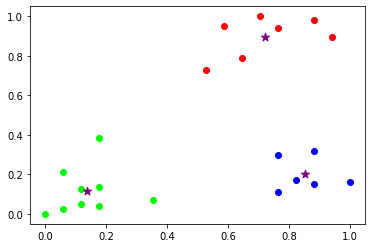

In [17]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

plt.scatter(data1.Age, data1['Income($)'], color='blue')
plt.scatter(data2.Age, data2['Income($)'], color='lime')
plt.scatter(data3.Age, data3['Income($)'], color='red')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=75);

### SSE plot

In [18]:
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


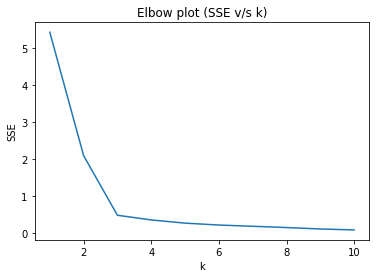

In [20]:
plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow plot (SSE v/s k)');

# Example 2 (iris dataset)

#### LOADING THE DATASET

In [51]:
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

##### Data preprocessing

In [53]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
iris.data.shape

(150, 4)

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [59]:
iris_df['flower'] = iris.target

In [60]:
iris_df.head()

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


Plotting the data

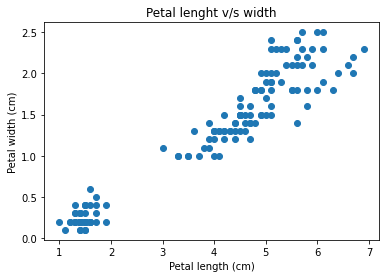

In [61]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal lenght v/s width');

Plotting dataset based on flower type

In [64]:
ir1 = iris_df[iris_df.flower == 0]
ir2 = iris_df[iris_df.flower == 1]
ir3 = iris_df[iris_df.flower == 2]

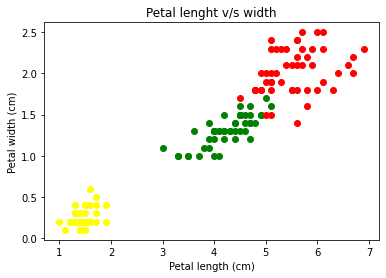

In [65]:
plt.scatter(ir1['petal length (cm)'], ir1['petal width (cm)'], color='yellow')
plt.scatter(ir2['petal length (cm)'], ir2['petal width (cm)'], color='green')
plt.scatter(ir3['petal length (cm)'], ir3['petal width (cm)'], color='red')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal lenght v/s width');

### K-means clustering

In [66]:
from sklearn.cluster import KMeans

In [68]:
kms = KMeans(n_clusters = 3)
preds = kms.fit_predict(iris_df[['petal length (cm)', 'petal width (cm)']])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
iris_df['predicts'] = preds
iris_df.head()

,petal length (cm),petal width (cm),flower,predicts
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


In [70]:
iris_df.predicts.value_counts()

2    52
0    50
1    48
Name: predicts, dtype: int64

In [71]:
iris_df.flower.value_counts()

0    50
1    50
2    50
Name: flower, dtype: int64

In [72]:
kms.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

#### Plotting the centroid

In [73]:
ir1 = iris_df[iris_df.predicts == 0]
ir2 = iris_df[iris_df.predicts == 1]
ir3 = iris_df[iris_df.predicts == 2]

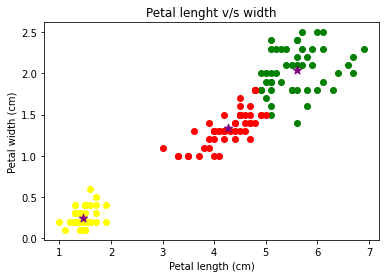

In [74]:
plt.scatter(ir1['petal length (cm)'], ir1['petal width (cm)'], color='yellow')
plt.scatter(ir2['petal length (cm)'], ir2['petal width (cm)'], color='green')
plt.scatter(ir3['petal length (cm)'], ir3['petal width (cm)'], color='red')

plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], marker='*', color='purple', s=75)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal lenght v/s width');

## SSE and elbow plot

In [76]:
sse = []
for i in range(1, 11):
    kmns = KMeans(n_clusters=i)
    kmns.fit(iris_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(kmns.inertia_)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


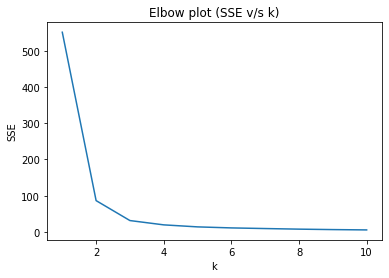

In [77]:
plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow plot (SSE v/s k)');